### Exploratory Data Analysis
##### Data set: Capital bike rentals

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Import data set and prepare (parse dates)
df_bikes=pd.read_csv('../data/train_bikes.csv', parse_dates=True, index_col=0)
df_bikes.dtypes
df_bikes.index

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [27]:
df_bikes.drop(columns=['casual','registered'], inplace=True)
df_bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168


In [28]:
df_bikes['month'] = df_bikes.index.month
df_bikes['day'] = df_bikes.index.day
df_bikes['year'] = df_bikes.index.year
df_bikes['hour'] = df_bikes.index.hour
df_bikes['weekday'] = df_bikes.index.weekday
df_bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,year,hour,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,1,1,2011,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,2011,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,1,1,2011,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,1,1,2011,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,1,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,12,19,2012,19,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,12,19,2012,20,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,12,19,2012,21,2


In [29]:
 # Check for missing value

df_bikes.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
month         0
day           0
year          0
hour          0
weekday       0
dtype: int64

<AxesSubplot:>

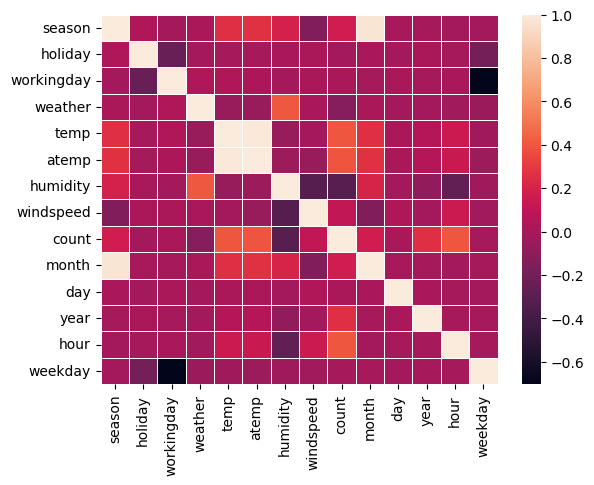

In [30]:
# Display correlations

sns.heatmap(df_bikes.corr(), linewidths=.5)

In [31]:
# Group by month
df_bikes['month'] = df_bikes.index.month
df_bikes_month = df_bikes.groupby('month').mean()
df_bikes_month

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,year,hour,weekday
month,,,,,,,,,,,,,
1,1.0,0.080317,0.622172,1.400452,9.840000,12.077579,55.911765,14.582959,90.366516,9.916290,2011.512443,11.730769,2.938914
2,1.0,0.000000,0.708102,1.458380,11.798535,14.532608,56.296337,13.963707,110.003330,10.012209,2011.504994,11.597114,3.136515
3,1.0,0.000000,0.710322,1.413984,15.902175,19.017220,56.678135,15.363249,148.169811,9.976693,2011.504994,11.601554,3.077691
4,2.0,0.052805,0.656766,1.432343,18.718372,22.305891,55.697470,15.581090,184.160616,10.006601,2011.499450,11.526953,2.954895
5,2.0,0.000000,0.736842,1.527412,22.674079,26.632374,68.084430,12.293956,219.459430,10.000000,2011.500000,11.500000,2.921053
6,2.0,0.000000,0.684211,1.309211,27.064496,30.988750,58.759868,12.348930,242.031798,10.000000,2011.500000,11.500000,3.157895
7,3.0,0.052632,0.657895,1.255482,30.841711,34.900395,58.402412,11.019928,235.325658,10.000000,2011.500000,11.500000,2.947368
8,3.0,0.000000,0.736842,1.351974,29.736689,33.122001,63.010965,11.931179,234.118421,10.000000,2011.500000,11.500000,3.000000
9,3.0,0.052805,0.630363,1.492849,25.779032,29.590248,70.980198,11.575698,233.805281,10.004400,2011.501650,11.531353,3.058306


<AxesSubplot:xlabel='season', ylabel='count'>

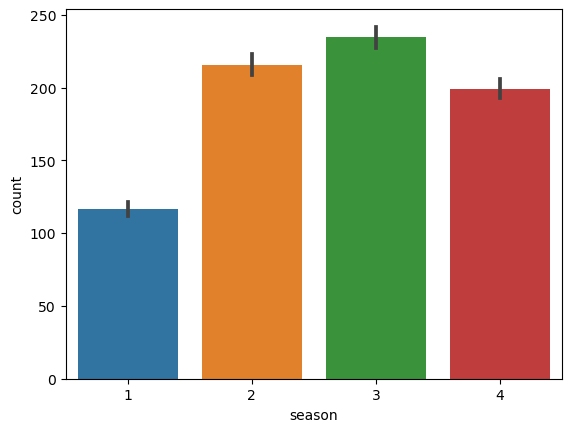

In [32]:
# Plot seasonal differences

sns.barplot(data=df_bikes, y='count', x='season')


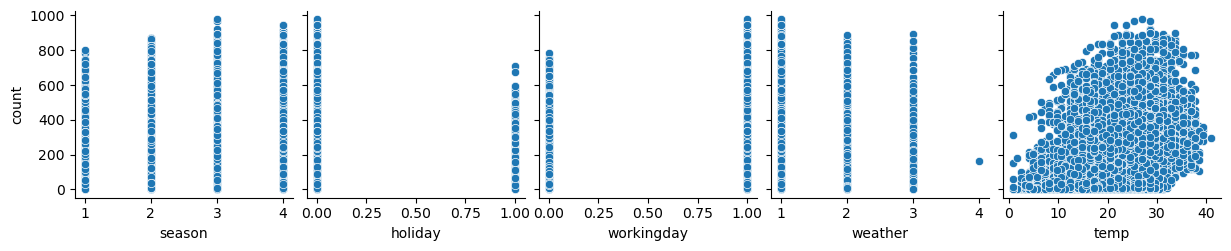

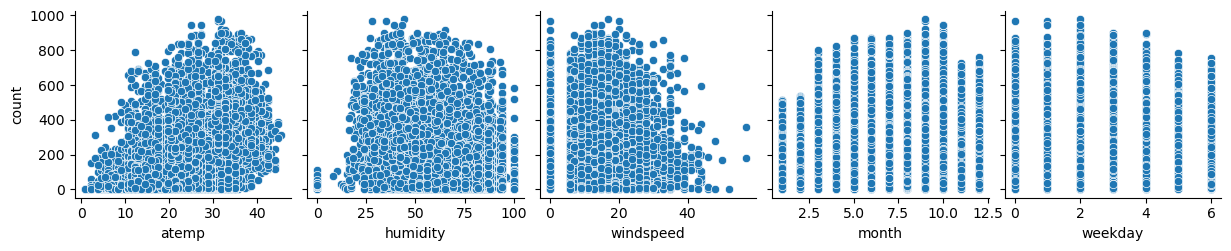

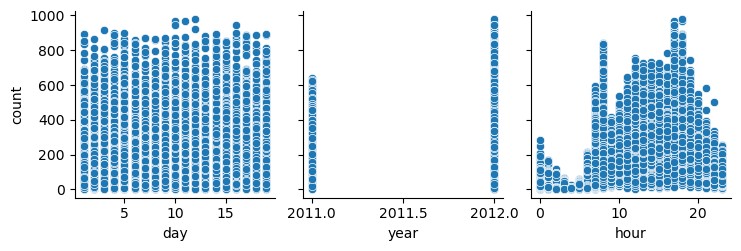

In [35]:
# Pairplot for an overview
sns.pairplot(data=df_bikes, y_vars=['count'], x_vars=['season', 'holiday', 'workingday', 'weather', 'temp'])
sns.pairplot(data=df_bikes, y_vars=['count'], x_vars=['atemp', 'humidity', 'windspeed', 'month', 'weekday'])
sns.pairplot(data=df_bikes, y_vars=['count'], x_vars=['day', 'year', 'hour'])


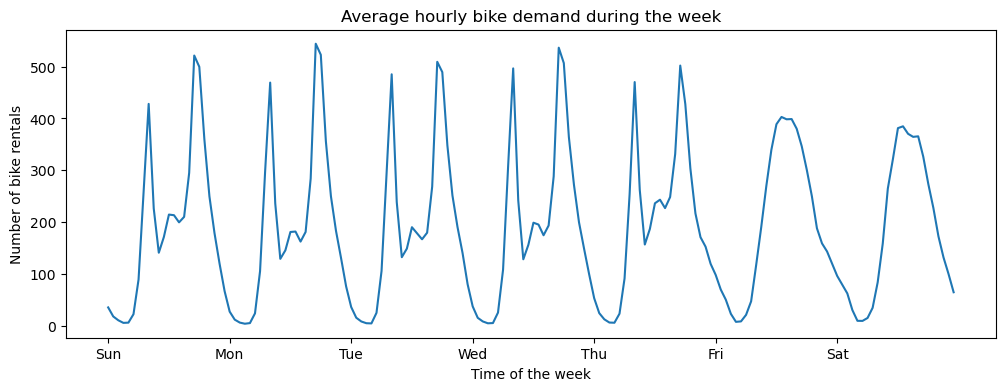

In [40]:
# Plot Average hourly bike demand

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_bikes.groupby(["weekday", "hour"])["count"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)